# **Craiglist Sales Prediction**
by: [Daniel Fernando Parulian Simangunsong](https://github.com/danielfsimangunsong) | 
[Github Repository](https://github.com/danielfsimangunsong/craiglist-sales-prediction)

---

## **Taks List**
1. Explore the dataset with the following conditions:
  1. The most popular vehicle types by state (Sort by manufacturer, model, fuel, transmission, drive, size, type and paint_color)
  2. The most frequently used car status (Hint: use the year column and odometer)
  3. State that post the most ads
2. Preprocess the dataset
3. Make predictions:
  1. Prices of used vehicles of certain types
  2. Fraud advertisements

# Set-up

In [1]:
! mkdir ~/.kaggle

In [2]:
! cp kaggle.json ~/.kaggle/

In [3]:
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
! kaggle datasets download austinreese/craigslist-carstrucks-data

 99% 261M/262M [00:12<00:00, 17.1MB/s]
100% 262M/262M [00:12<00:00, 22.2MB/s]


In [5]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset Checking and Exploration

In [9]:
# Import dataset
raw_data = pd.read_csv("craigslist-carstrucks-data.zip")

In [88]:
# First five rows of dataset
raw_data.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [ ]:
print("Number of rows: ", raw_data.shape[0])
print("Number of columns: ", raw_data.shape[1])

Number of rows:  426880
Number of columns:  26


In [ ]:
# Numeric dataset characteristic
raw_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,426880.0,7.311487e+09,4.473170e+06,7.207408e+09,7.308143e+09,7.312621e+09,7.315254e+09,7.317101e+09
price,426880.0,7.519903e+04,1.218228e+07,0.000000e+00,5.900000e+03,1.395000e+04,2.648575e+04,3.736929e+09
year,425675.0,2.011235e+03,9.452120e+00,1.900000e+03,2.008000e+03,2.013000e+03,2.017000e+03,2.022000e+03
odometer,422480.0,9.804333e+04,2.138815e+05,0.000000e+00,3.770400e+04,8.554800e+04,1.335425e+05,1.000000e+07
county,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lat,420331.0,3.849394e+01,5.841533e+00,-8.412225e+01,3.460190e+01,3.915010e+01,4.239890e+01,8.239082e+01
long,420331.0,-9.474860e+01,1.836546e+01,-1.598277e+02,-1.119398e+02,-8.843260e+01,-8.083204e+01,1.738855e+02


In [ ]:
# Non-numeric dataset characteristic
raw_data.describe(include=object).T

,count,unique,top,freq
url,426880,426880,https://prescott.craigslist.org/cto/d/prescott...,1
region,426880,404,columbus,3608
region_url,426880,413,https://spokane.craigslist.org,2988
manufacturer,409234,42,ford,70985
model,421603,29667,f-150,8009
condition,252776,6,good,121456
cylinders,249202,8,6 cylinders,94169
fuel,423867,5,gas,356209
title_status,418638,6,clean,405117
transmission,424324,3,automatic,336524


In [ ]:
# Quick overview of dataset
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

> As we can see that "county" column only has null value, so I will drop it.

### Task 1.1. The most popular vehicle types by state

In [ ]:
# Display the most popular vehicle types by state
# Each state displayed its popular value for each column of manufacturer, model, fuel, transmission, drive, size, type and paint_color
state_data = raw_data.groupby(['state']).agg(pd.Series.mode)
state_data[['manufacturer', 'model', 'fuel', 'transmission', 'drive', 'size', 'type', 'paint_color']]

,manufacturer,model,fuel,transmission,drive,size,type,paint_color
state,,,,,,,,
ak,ford,f-150,gas,automatic,4wd,full-size,SUV,white
al,ford,f-150,gas,automatic,fwd,full-size,sedan,white
ar,chevrolet,silverado 1500,gas,automatic,4wd,full-size,pickup,white
az,ford,f-150,gas,automatic,fwd,full-size,sedan,white
ca,ford,f-150,gas,automatic,fwd,full-size,sedan,white
co,ford,f-150,gas,automatic,4wd,full-size,SUV,white
ct,ford,forester,gas,automatic,4wd,full-size,sedan,black
dc,ford,camry,gas,automatic,fwd,full-size,sedan,black
de,ford,super duty f-550 drw,gas,automatic,4wd,full-size,sedan,white


### Task 1.2. The most frequently state uses car

In [ ]:
# Create new column "total_usage" that has value of usage of car
# The value is from odometer divided by year spent car is used
# If there is year that has value less then or equal to 0, the value is odomoter
current_year = 2021
raw_data["total_usage"] = raw_data.apply(lambda row: row["odometer"]/(current_year-row["year"])
                                          if ((current_year-row["year"]) > 0) 
                                          else row["odometer"],
                                          axis=1)

In [ ]:
# Create a grouped by dataframe by state
groupby_state = raw_data.groupby("state", as_index=False).sum()
groupby_state = groupby_state.sort_values("total_usage", ascending=False)
groupby_state.head()

,state,id,price,year,odometer,lat,long,total_usage
4,ca,370118000501500,6079810600,101542366.0,4.647913e+09,1.831731e+06,-5.951609e+06,5.662541e+08
43,tx,167780918621832,489738641,46071964.0,2.374037e+09,7.041447e+05,-2.247992e+06,3.892099e+08
9,fl,208467430078681,508986359,57205929.0,2.873596e+09,8.037212e+05,-2.327302e+06,3.565830e+08
22,mi,123555653136052,508226170,33987799.0,1.891498e+09,7.201685e+05,-1.422465e+06,2.227544e+08
34,ny,141736658076538,329106819,38967787.0,1.688486e+09,8.058422e+05,-1.445525e+06,2.083921e+08


Text(0.5, 1.0, 'Total Car Usage Each State')

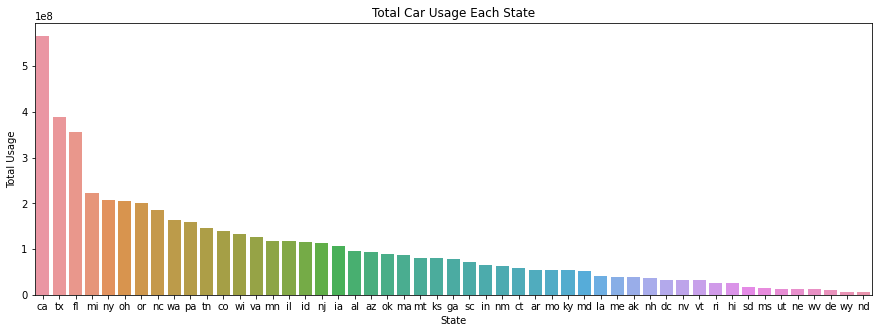

In [ ]:
# Create a barplot to visualize "total_usage" column by state
plt.figure(figsize=(15,5))
sns.barplot(x="state", y="total_usage", data=groupby_state)
plt.xlabel("State")
plt.ylabel("Total Usage")
plt.title("Total Car Usage Each State")

> So, California is the most frequent state uses cars

### Task 1.3. State that post the most ads

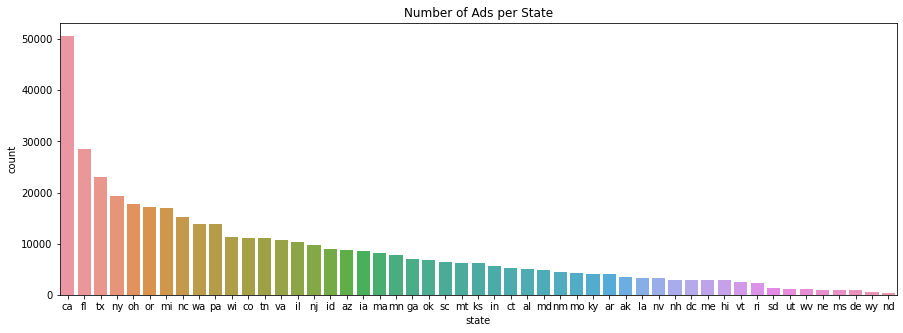

In [ ]:
# Create a countplot to visualize the state frequency of posting ads
plt.figure(figsize=(15,5))
sns.countplot(x="state", data=raw_data, order = raw_data["state"].value_counts().index)
plt.title("Number of Ads per State");

> So, California is the most frequent state that post ads

# Task 2. Dataset Preprocessing

## Missing values handling
In this part also do some feature engeneering to get more useful data.

In [10]:
# Function to check the total and percentage of missing values ​​in the dataframe
def cek_null(df):
    col_na = df.isnull().sum().sort_values(ascending=False)
    percent = col_na / len(df)
    
    missing_data = pd.concat([col_na, percent], axis=1, keys=["Total", "Percent"])
    result = missing_data[missing_data["Total"] > 0]
    if (result.shape[0]>0):
      print(result)
    else:
      print("There is no null value")

In [11]:
cek_null(raw_data)

               Total   Percent
county        426880  1.000000
size          306361  0.717675
cylinders     177678  0.416225
condition     174104  0.407852
VIN           161042  0.377254
drive         130567  0.305863
paint_color   130203  0.305011
type           92858  0.217527
manufacturer   17646  0.041337
title_status    8242  0.019308
lat             6549  0.015342
long            6549  0.015342
model           5277  0.012362
odometer        4400  0.010307
fuel            3013  0.007058
transmission    2556  0.005988
year            1205  0.002823
description       70  0.000164
image_url         68  0.000159
posting_date      68  0.000159


In [12]:
to_del_col = ["county", "id", "url", "VIN", "description", "region", "region_url", "image_url", "lat", "size", "model", "long"]
raw_data = raw_data.drop(raw_data[to_del_col], axis=1)

In [13]:
# Menghapus sisa baris yang memiliki nilai null
no_null_values_data = raw_data.dropna()

In [14]:
cek_null(no_null_values_data)

There is no null value


## Duplicate rows handling

In [15]:
# View number of duplicate rows 
print("Number of duplicate rows: ", no_null_values_data.duplicated().sum())

Number of duplicate rows:  285


In [29]:
# Drop duplicate rows
no_duplicate_row_data = no_null_values_data.drop_duplicates()

In [17]:
print("Number of duplicate rows: ", no_duplicate_row_data.duplicated().sum())

Number of duplicate rows:  0


## Feature Engineering

In [ ]:
# Drop rows that has "posting_date" less than "year" (manfactured year)
# and then drop "posting_date" column
# Idea from https://github.com/KushanSingh/Used-Cars-Dataset-EDA/blob/main/vehicles.ipynb

# Create a new column only the substring of year from the "posting_date" column
no_duplicate_row_data["posting_year"]  = no_duplicate_row_data["posting_date"].str.slice(0, 4)
no_duplicate_row_data["posting_year"]  = no_duplicate_row_data["posting_year"].astype(float)

# Drop rows that has "posting_date" less than "year"
no_duplicate_row_data = no_duplicate_row_data.drop(no_duplicate_row_data[no_duplicate_row_data["posting_year"] < no_duplicate_row_data["year"]].index)

# Drop "posting_date" column
no_duplicate_row_data = no_duplicate_row_data.drop(["posting_date"], axis = 1)

In [31]:
# Extract the number and then replace the column value with that number in the "cylinders" column
no_duplicate_row_data["cylinders"] = no_duplicate_row_data["cylinders"].str.extract("(\d+)")

# Fill null value with 0 in "cylinders" column if fuel value is 'electric'
no_duplicate_row_data["cylinders"] = no_duplicate_row_data.apply(
    lambda row: 0 if (pd.isnull(row["cylinders"]) and (row["fuel"] == 'electric')) 
       else row["cylinders"],
    axis=1
)

In [32]:
# Drop rows with a "price" less than equal to 0
no_duplicate_row_data = no_duplicate_row_data[no_duplicate_row_data["price"] > 0]

In [33]:
# Drop rows with a "year" less than equal to 0
no_duplicate_row_data = no_duplicate_row_data[no_duplicate_row_data["year"] > 0]

In [34]:
# Check number of unique value of each non-numeric column
non_numeric_cols = ["manufacturer", "condition", "cylinders", "fuel", "title_status", "transmission", "drive", "type", "paint_color", "state"]
for cols in non_numeric_cols:
  print("%15s" % cols + "%5d" % (no_duplicate_row_data[cols].nunique()))

   manufacturer   42
      condition    6
      cylinders    8
           fuel    5
   title_status    6
   transmission    3
          drive    3
           type   13
    paint_color   12
          state   51


> Because there are so many unique value in manufacturer, type, paint_color, and state columns, I will drop them

In [35]:
no_duplicate_row_data = no_duplicate_row_data.drop(["manufacturer", "type", "paint_color", "state"], axis=1)

## Convert categorical columns to dummy variables

In [36]:
# Convert categorical column to dummy
dummies = pd.get_dummies(no_duplicate_row_data[["condition", "cylinders", "fuel", "title_status", "transmission", "drive"]], 
                                            drop_first=True)
# Drop unused column
no_duplicate_row_data = no_duplicate_row_data.drop(["condition", "cylinders", "fuel", "title_status", "transmission", "drive"], axis=1)
# Concate dummies with original dataset
preprocessed_data = pd.concat([no_duplicate_row_data,dummies],axis=1)

In [37]:
preprocessed_data.head()

,price,year,odometer,posting_year,condition_fair,condition_good,condition_like new,condition_new,condition_salvage,cylinders_10,cylinders_12,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage,transmission_manual,transmission_other,drive_fwd,drive_rwd
31,15000,2013.0,128000.0,2021.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
32,27990,2012.0,68696.0,2021.0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
33,34590,2016.0,29499.0,2021.0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
34,35000,2019.0,43000.0,2021.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
35,29990,2016.0,17302.0,2021.0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [38]:
print("Number of rows: ", preprocessed_data.shape[0])
print("Number of columns: ", preprocessed_data.shape[1])

Number of rows:  112515
Number of columns:  29


# Price Prediction

## Preparation

In [39]:
# Further preprocessing is required before creating the price prediction model
# Another value preprocessing required is to delete rows that has a value of >= 45000 or <= 500
# It also aims to handle outliers more precisely by removing values ​​that are too low or too high
# Idea found at https://github.com/panambY/Used_Car_Price/blob/master/Used_Car_Price.ipynb
price_pred_data = preprocessed_data[(preprocessed_data["price"]>500) & (preprocessed_data["price"]<45000)]

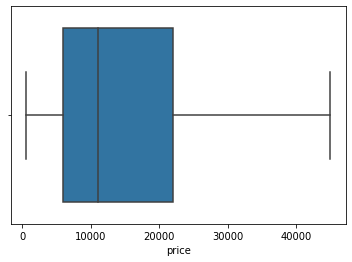

In [40]:
# Create a boxplot
sns.boxplot(x=price_pred_data["price"])

In [41]:
# Split features and target columns
X = price_pred_data.drop(["price"], axis=1)
y = price_pred_data["price"]

In [65]:
# Perform train-test-split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
# Normalize feature column value using standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Function for regression model evaluation

In [47]:
# Function for regression model evaluation
import math 
from sklearn import metrics

# Idea from https://github.com/panambY/Used_Car_Price/blob/master/Used_Car_Price.ipynb
def evaluate_regressor_performance(model_name, prediction, y_test = y_test):
  # Value of MSE, MAE, RMSE, and R2 Square
  mse = metrics.mean_squared_error(y_test, prediction)
  mae = metrics.mean_absolute_error(y_test, prediction)
  rmse = math.sqrt(metrics.mean_squared_error(y_test, prediction))
  r2_square = metrics.r2_score(y_test, prediction)
  return pd.DataFrame( { 'Model Name': model_name,
                           'MSE': mse,
                           'MAE': mae,
                           'RMSE': rmse, 
                           'R2 Square': r2_square}, index=[0] )

## Gradient Boosting Regressor

In [67]:
# Create and train Gradient Boosting Regressor model
from sklearn.ensemble import GradientBoostingRegressor
gbr_model = GradientBoostingRegressor(random_state=42, max_depth=10)

gbr_model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=10, random_state=42)

In [68]:
# Predict "price" with Gradient Boosting Regressor model
gbr_pred = gbr_model.predict(X_test)

In [69]:
# Evaluate Gradient Boosting Regressor model
gbr_evaluation = evaluate_regressor_performance("GradientBoostingRegressor", gbr_pred)
gbr_evaluation

,Model Name,MSE,MAE,RMSE,R2 Square
0,GradientBoostingRegressor,1.679632e+07,2722.353142,4098.330928,0.864036


## Random Forest Regressor

In [79]:
# Create and train Random Forest Regressor model
from sklearn.ensemble import RandomForestRegressor
rfr_model = RandomForestRegressor(random_state=42)

rfr_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [80]:
# Predict "price" with Random Forest Regressor model
rfr_pred = rfr_model.predict(X_test)

In [81]:
# Evaluate Gradient Random Forest Regressor model
rfr_evaluation = evaluate_regressor_performance("RandomForestRegressor", rfr_pred)
rfr_evaluation

,Model Name,MSE,MAE,RMSE,R2 Square
0,RandomForestRegressor,1.583459e+07,2279.107549,3979.270207,0.871822


## Neural Network